In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')


In [3]:
# Define the file path
file_path = r'C:\Users\Win10\Desktop\Heart Disease data.csv'

# Read the CSV file
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# DATA CLEANING

In [4]:
# Check for missing values
missing_values = df.isnull().sum()

# Check for duplicates
duplicates = df.duplicated().sum()

# Display the results
missing_values, duplicates

# Drop duplicates if any
df = df.drop_duplicates()

# Handle missing values if any (example: fill with mean)
# df.fillna(df.mean(), inplace=True)

# Display the cleaned DataFrame info
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [5]:
df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


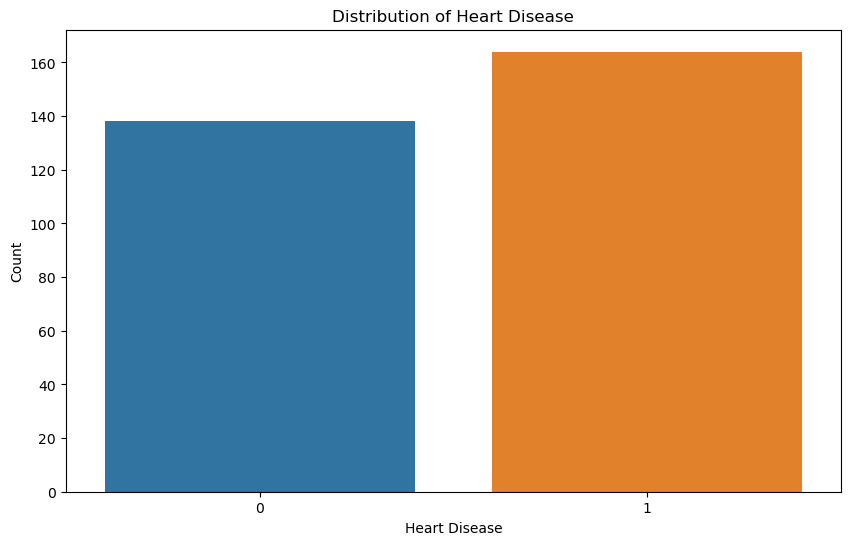

In [6]:

# Distribution of target variable
plt.figure(figsize=(10, 6))
sns.countplot(x='target', data=df)
plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()

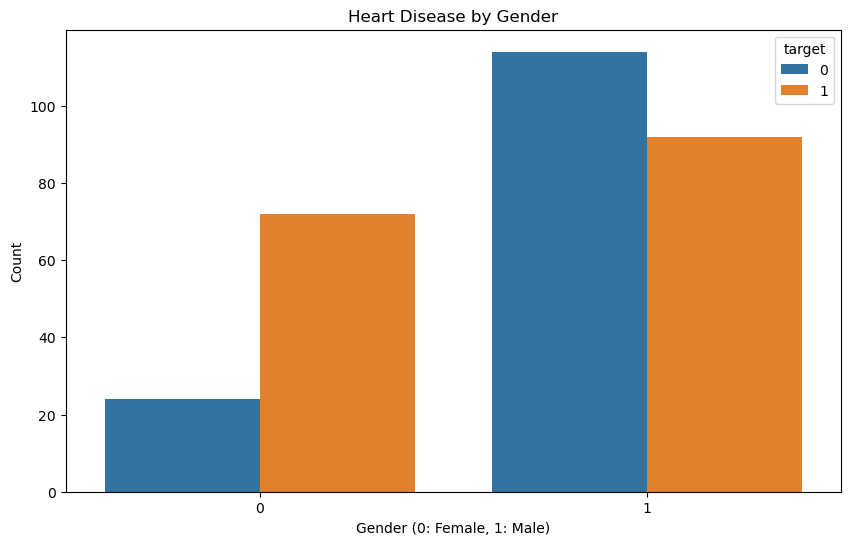

In [7]:
# Heart disease by gender
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', hue='target', data=df)
plt.title('Heart Disease by Gender')
plt.xlabel('Gender (0: Female, 1: Male)')
plt.ylabel('Count')
plt.show()

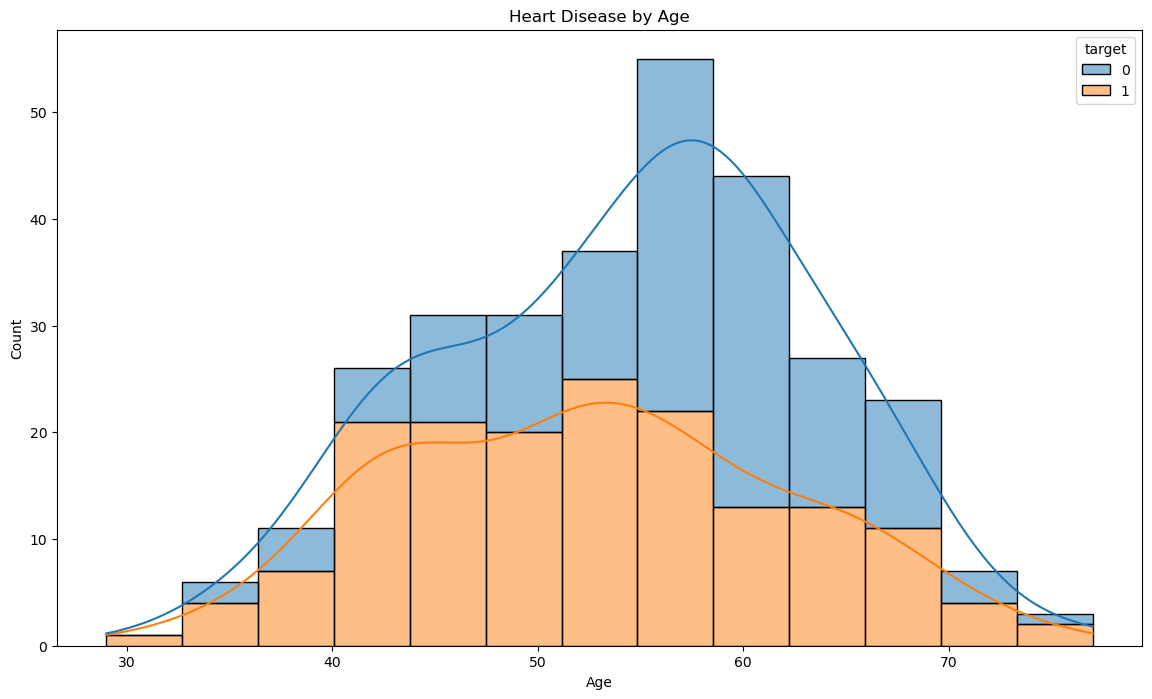

In [8]:
# Heart disease by age
plt.figure(figsize=(14, 8))
sns.histplot(data=df, x='age', hue='target', multiple='stack', kde=True)
plt.title('Heart Disease by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


In [9]:
target = df.groupby('target').size()
target

target
0    138
1    164
dtype: int64

In [10]:
#Numerical Data into Categorical Data Conversion

def heart_disease(row):
    if row==0:
        return 'NO'
    elif row==1:
        return 'YES'

In [11]:
df['Heart_Disease']=df['target'].apply(heart_disease)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart_Disease
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,NO
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,NO
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,NO
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,NO
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,NO


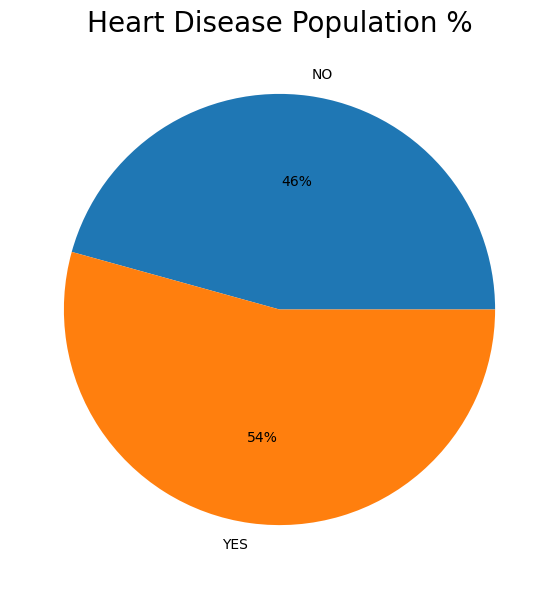

In [12]:
#Pie Chart for People having Heart Disease
plt.figure(figsize=(10,7))
plt.pie(target, labels=['NO','YES'], autopct='%0.0f%%')
plt.title('Heart Disease Population %', fontsize=20)
plt.show()

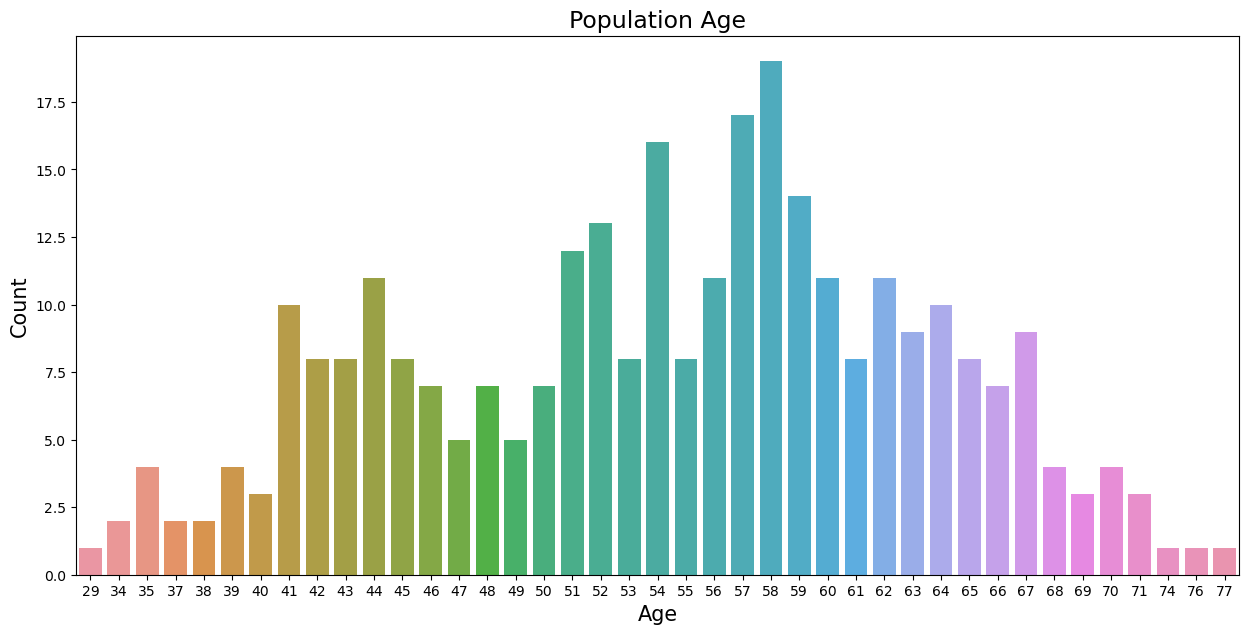

In [13]:
#Countplot based on Person's Age

plt.figure(figsize=(15,7))
sns.countplot(x='age', data=df)
plt.title('Population Age', fontsize=17)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

In [14]:
#Statistical Analysis
Min_Age=df['age'].min()
Max_Age=df['age'].max()
Mean_Age=df['age'].mean()
print("Minimum Age =",Min_Age)
print("Maximum Age =",Max_Age)
print("Mean Age =",Mean_Age)

Minimum Age = 29
Maximum Age = 77
Mean Age = 54.420529801324506


In [15]:
#Categorical Analysis

Young_Ages=df[(df['age']>=20) & (df['age']<35)]
Middle_Ages=df[(df['age']>=35) & (df['age']<50)]
Elderly_Ages=df[(df['age']>50)]
print('Young Ages =',len(Young_Ages))
print('Middle Ages =',len(Middle_Ages))
print('Elderly Ages =',len(Elderly_Ages))

Young Ages = 3
Middle Ages = 84
Elderly Ages = 208


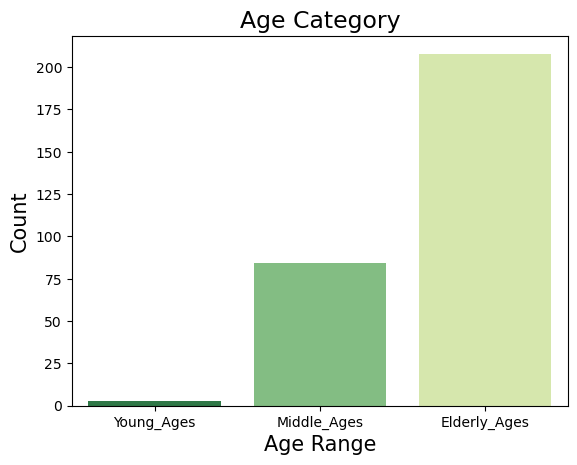

In [16]:
#Bar Plot Creation of Age Category 

sns.barplot(x=['Young_Ages','Middle_Ages','Elderly_Ages'], y=[len(Young_Ages), len(Middle_Ages), len(Elderly_Ages)], palette='YlGn_r')
plt.title('Age Category', fontsize=17)
plt.xlabel('Age Range', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

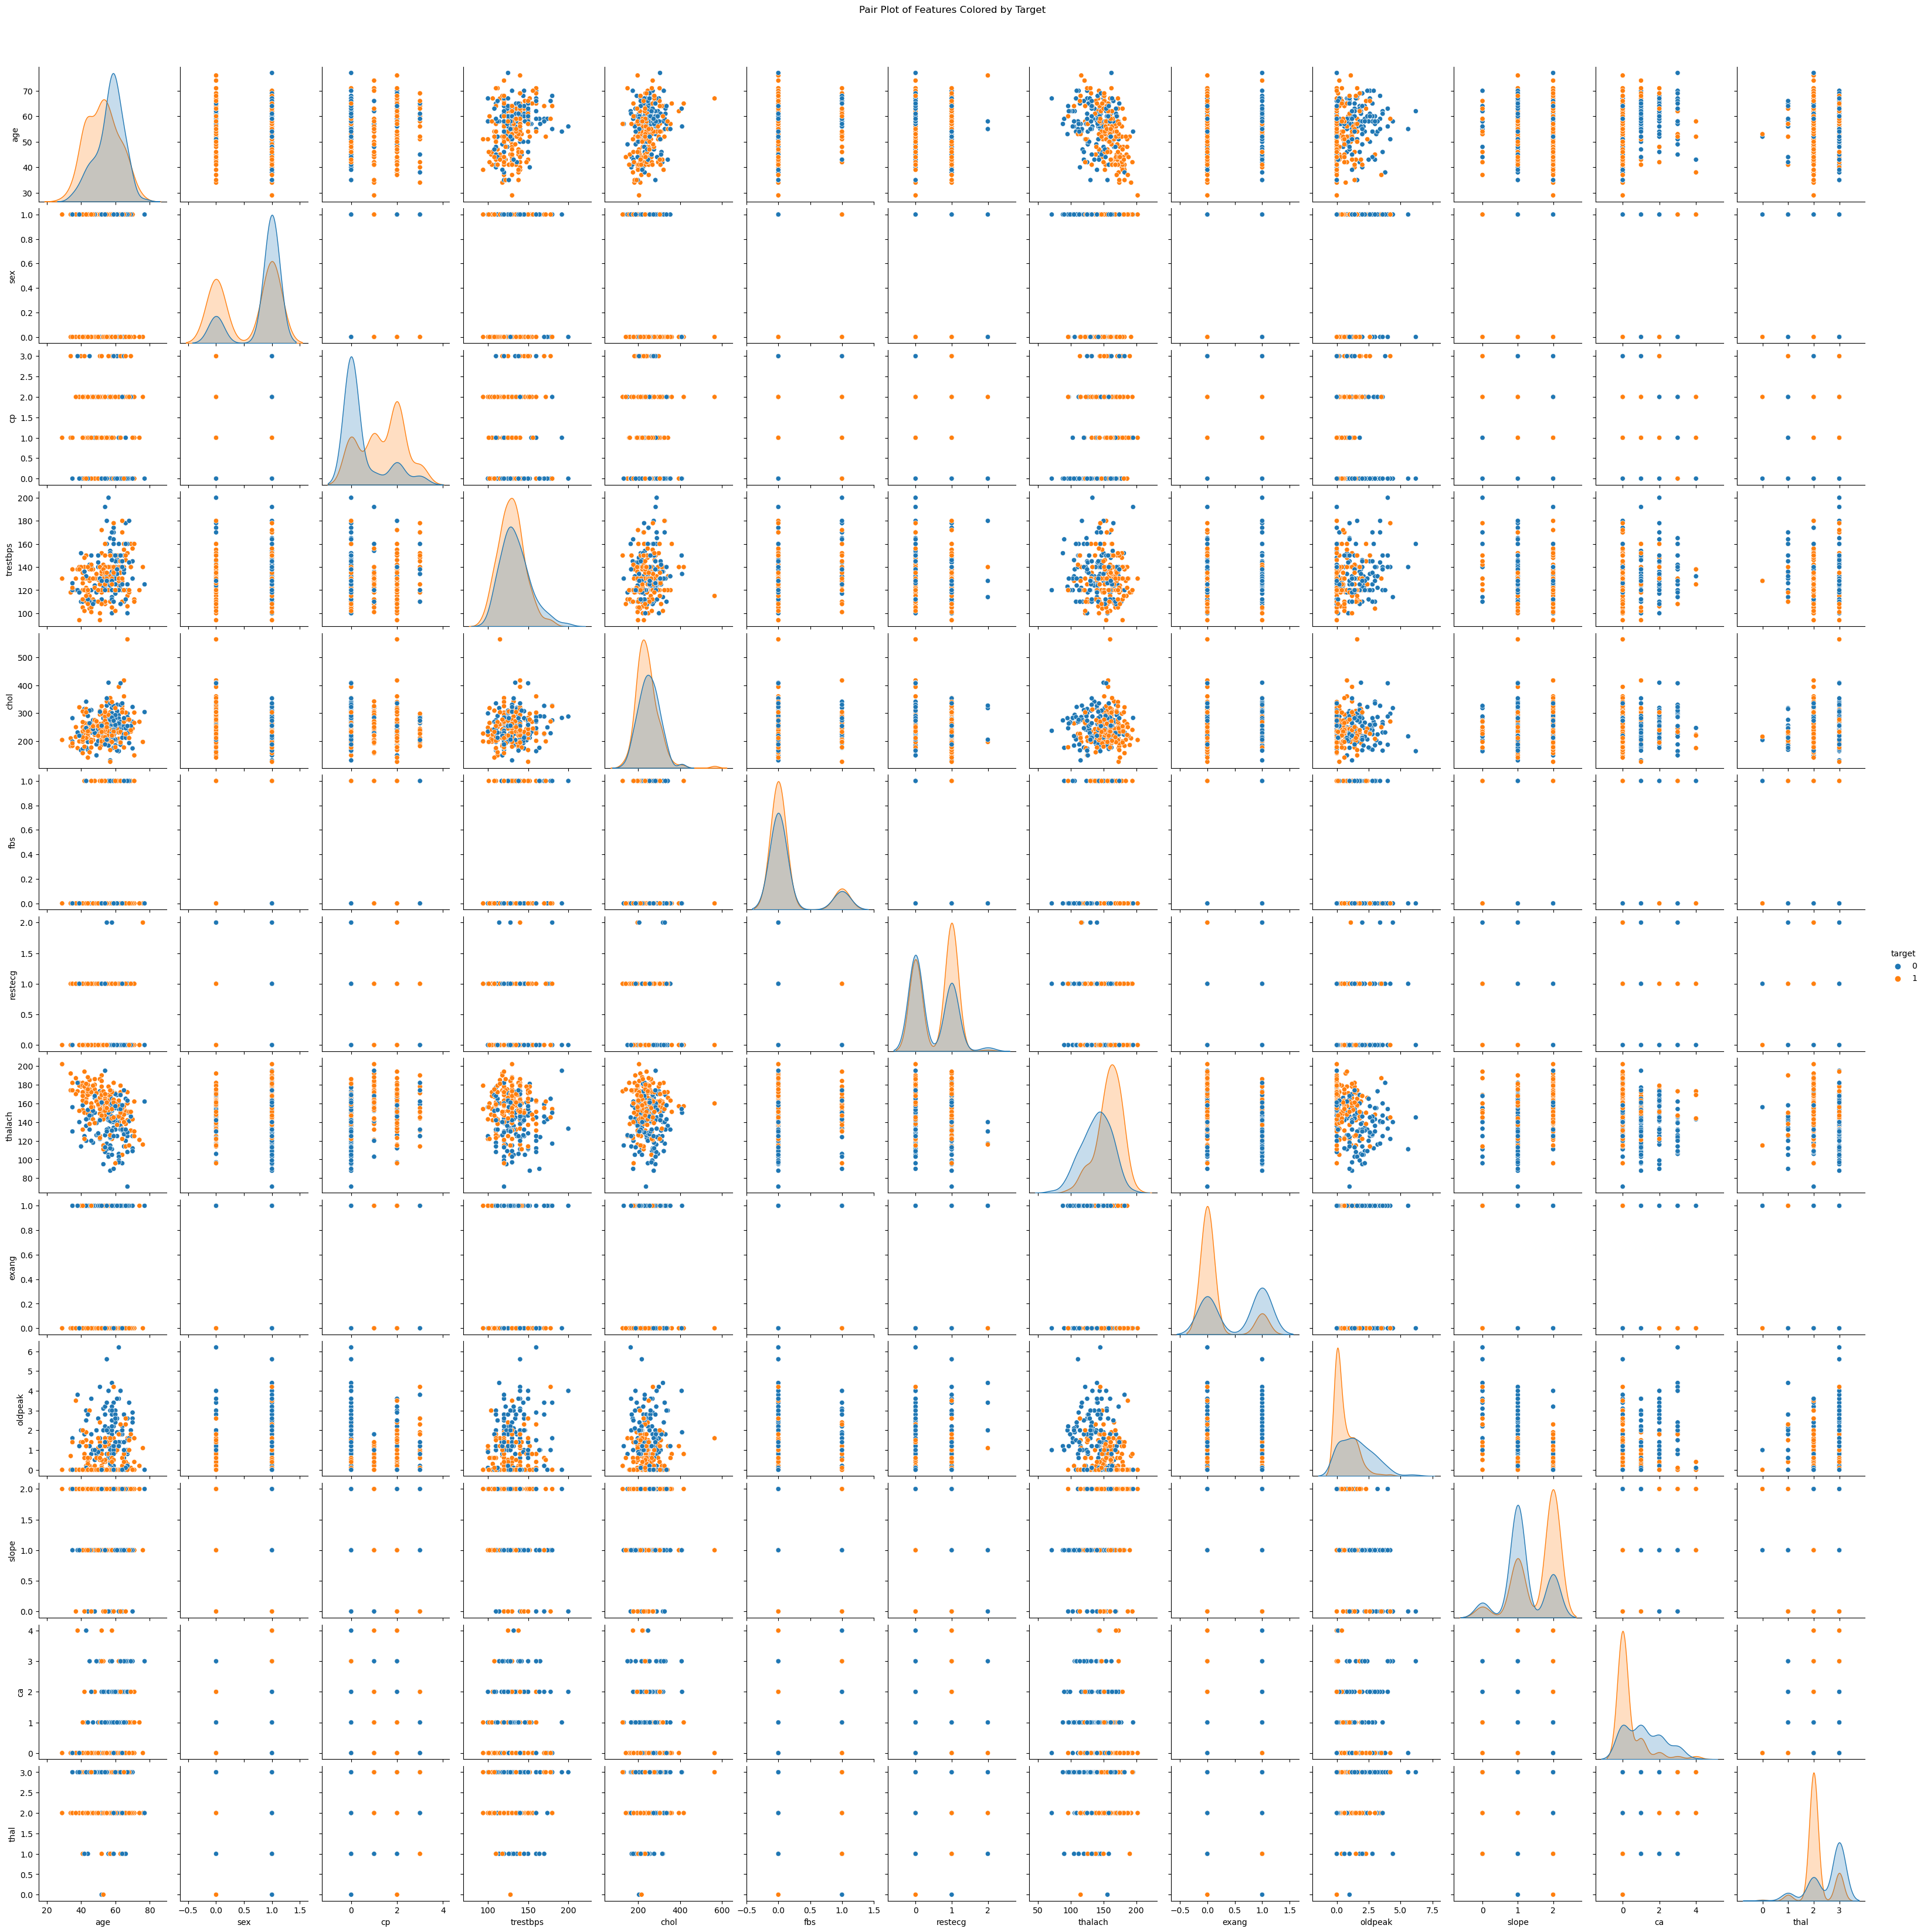

In [17]:
sns.pairplot(df, hue='target')
plt.suptitle('Pair Plot of Features Colored by Target', y=1.02)
plt.show()


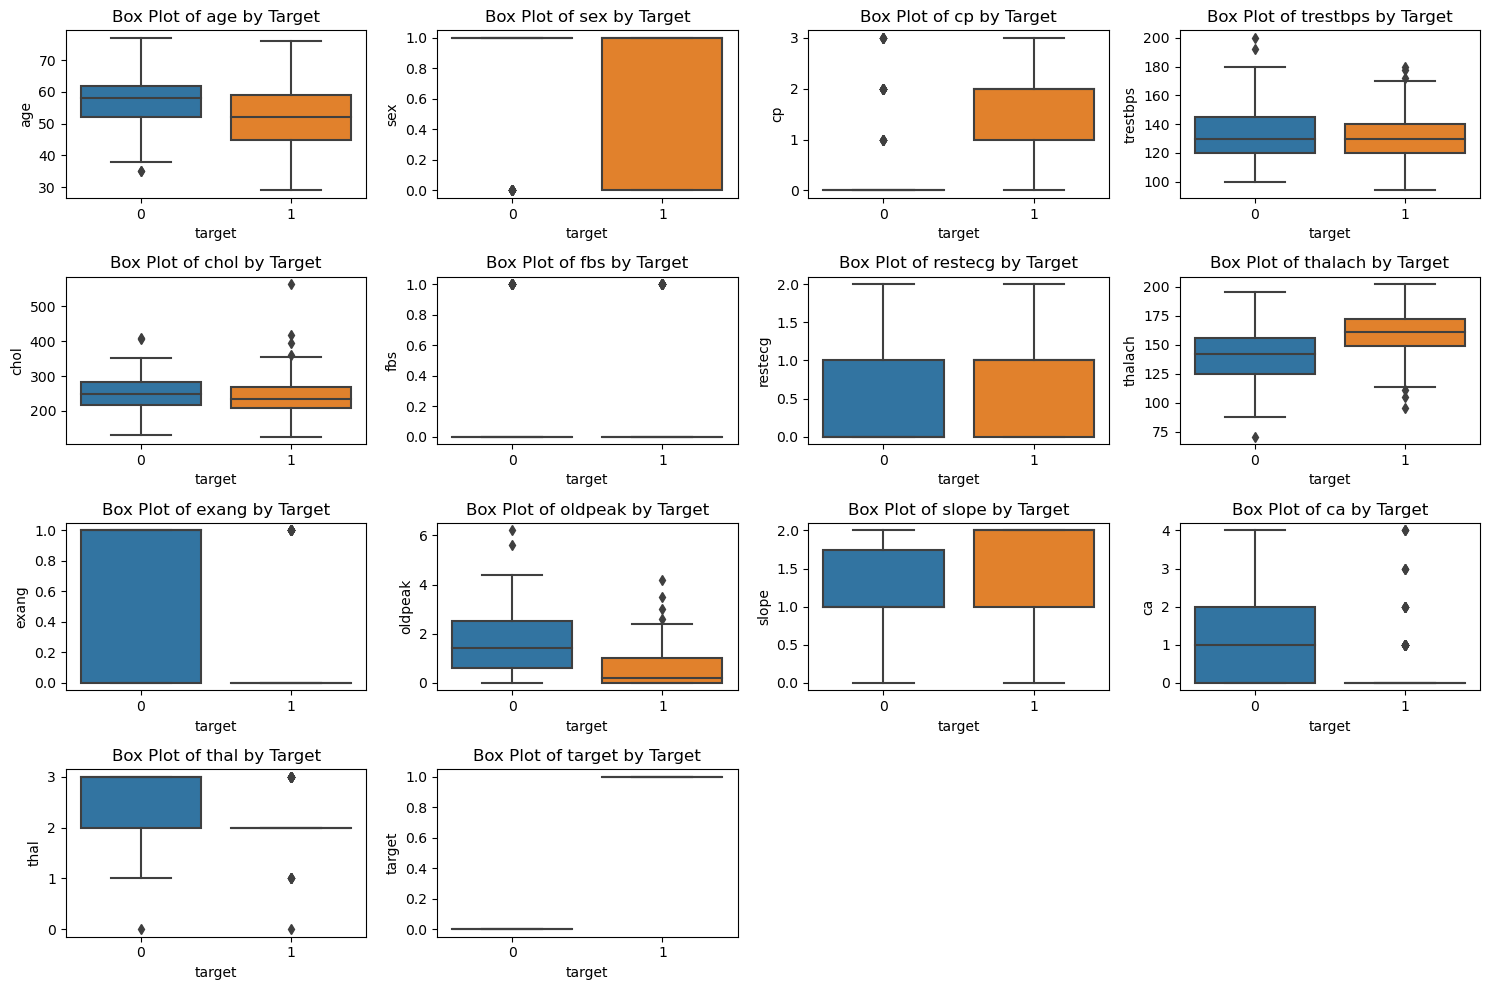

In [18]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[:-1], 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=df[column], x=df['target'])
    plt.title(f'Box Plot of {column} by Target')
plt.tight_layout()
plt.show()


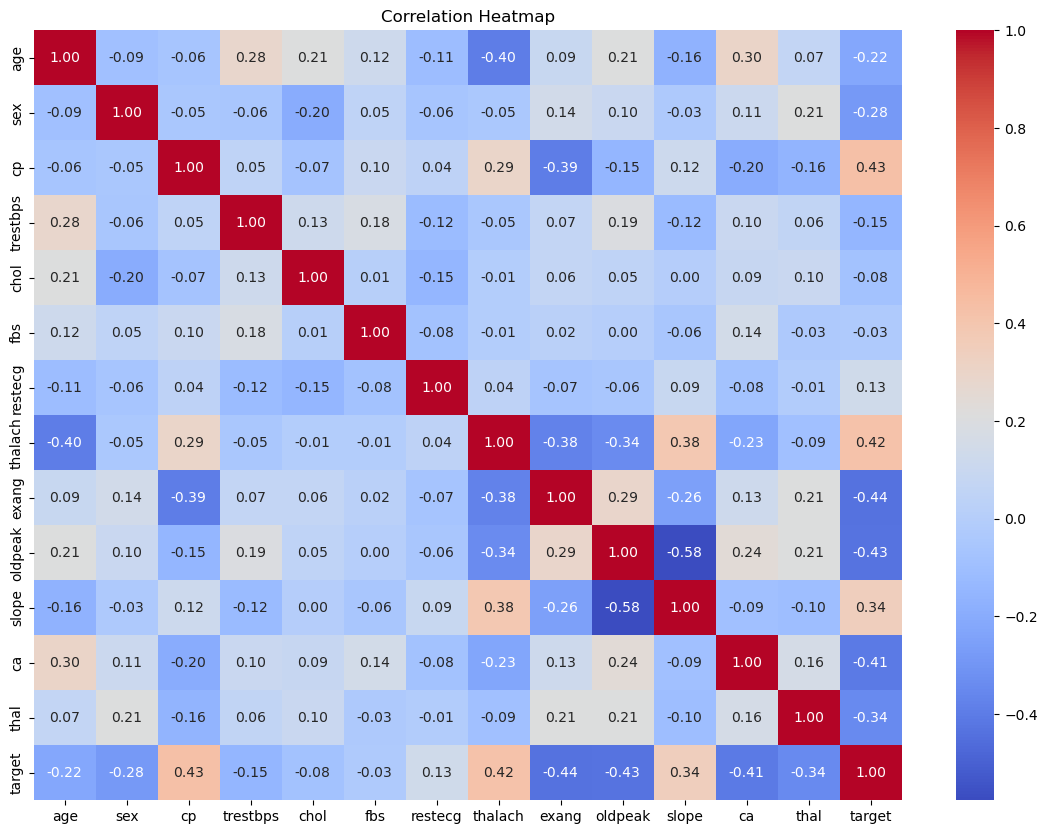

In [19]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


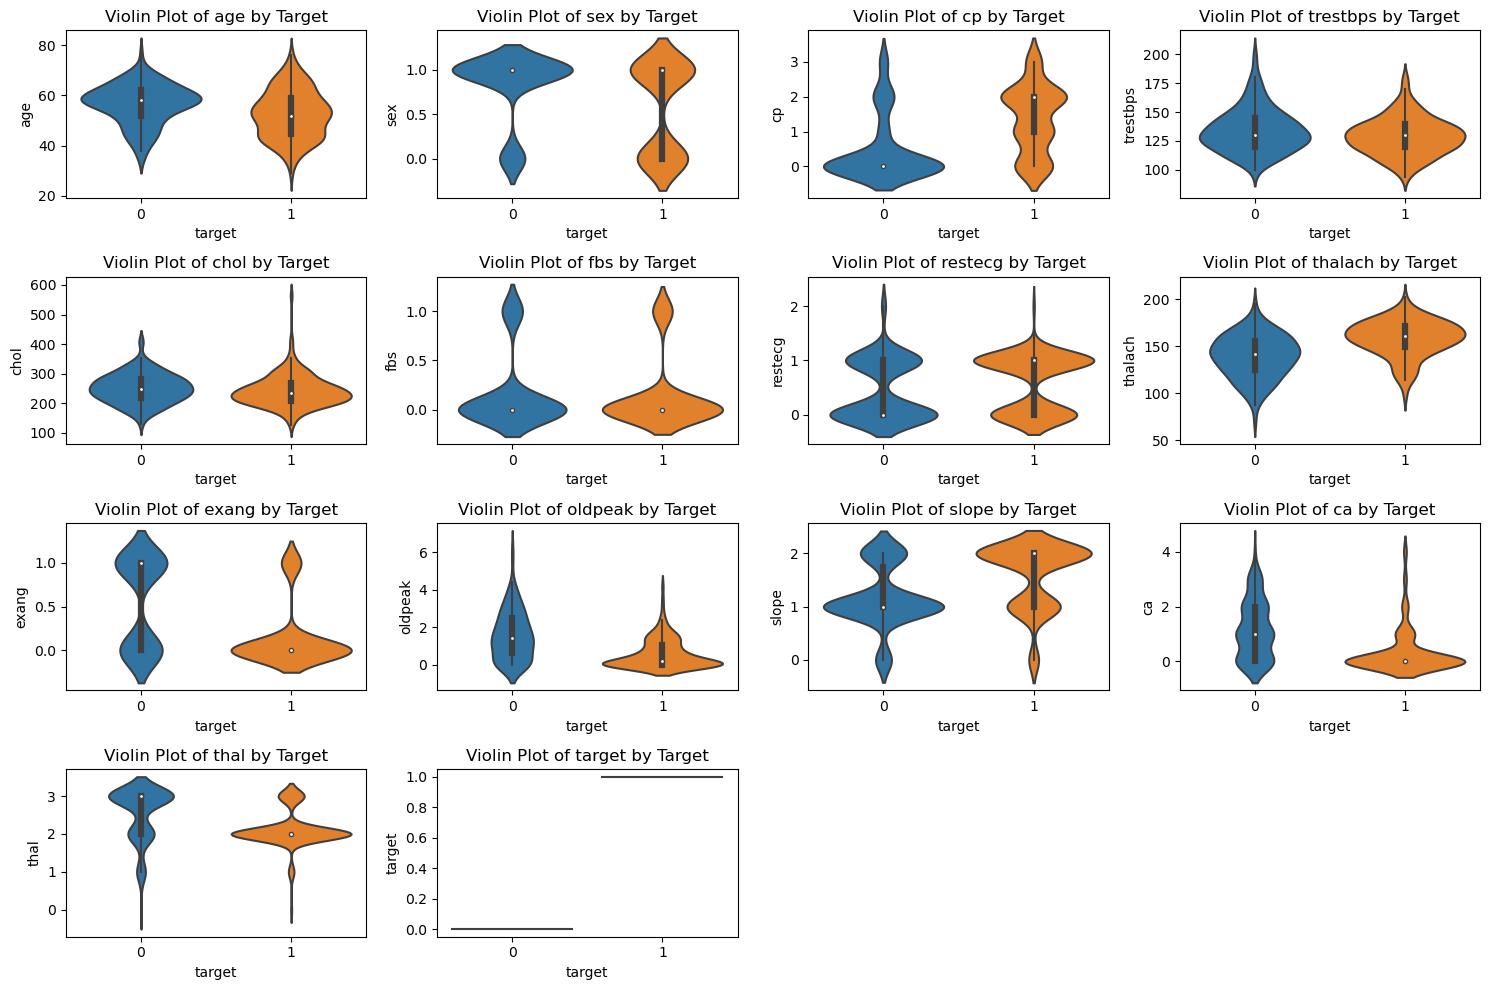

In [20]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[:-1], 1):
    plt.subplot(4, 4, i)
    sns.violinplot(y=df[column], x=df['target'])
    plt.title(f'Violin Plot of {column} by Target')
plt.tight_layout()
plt.show()


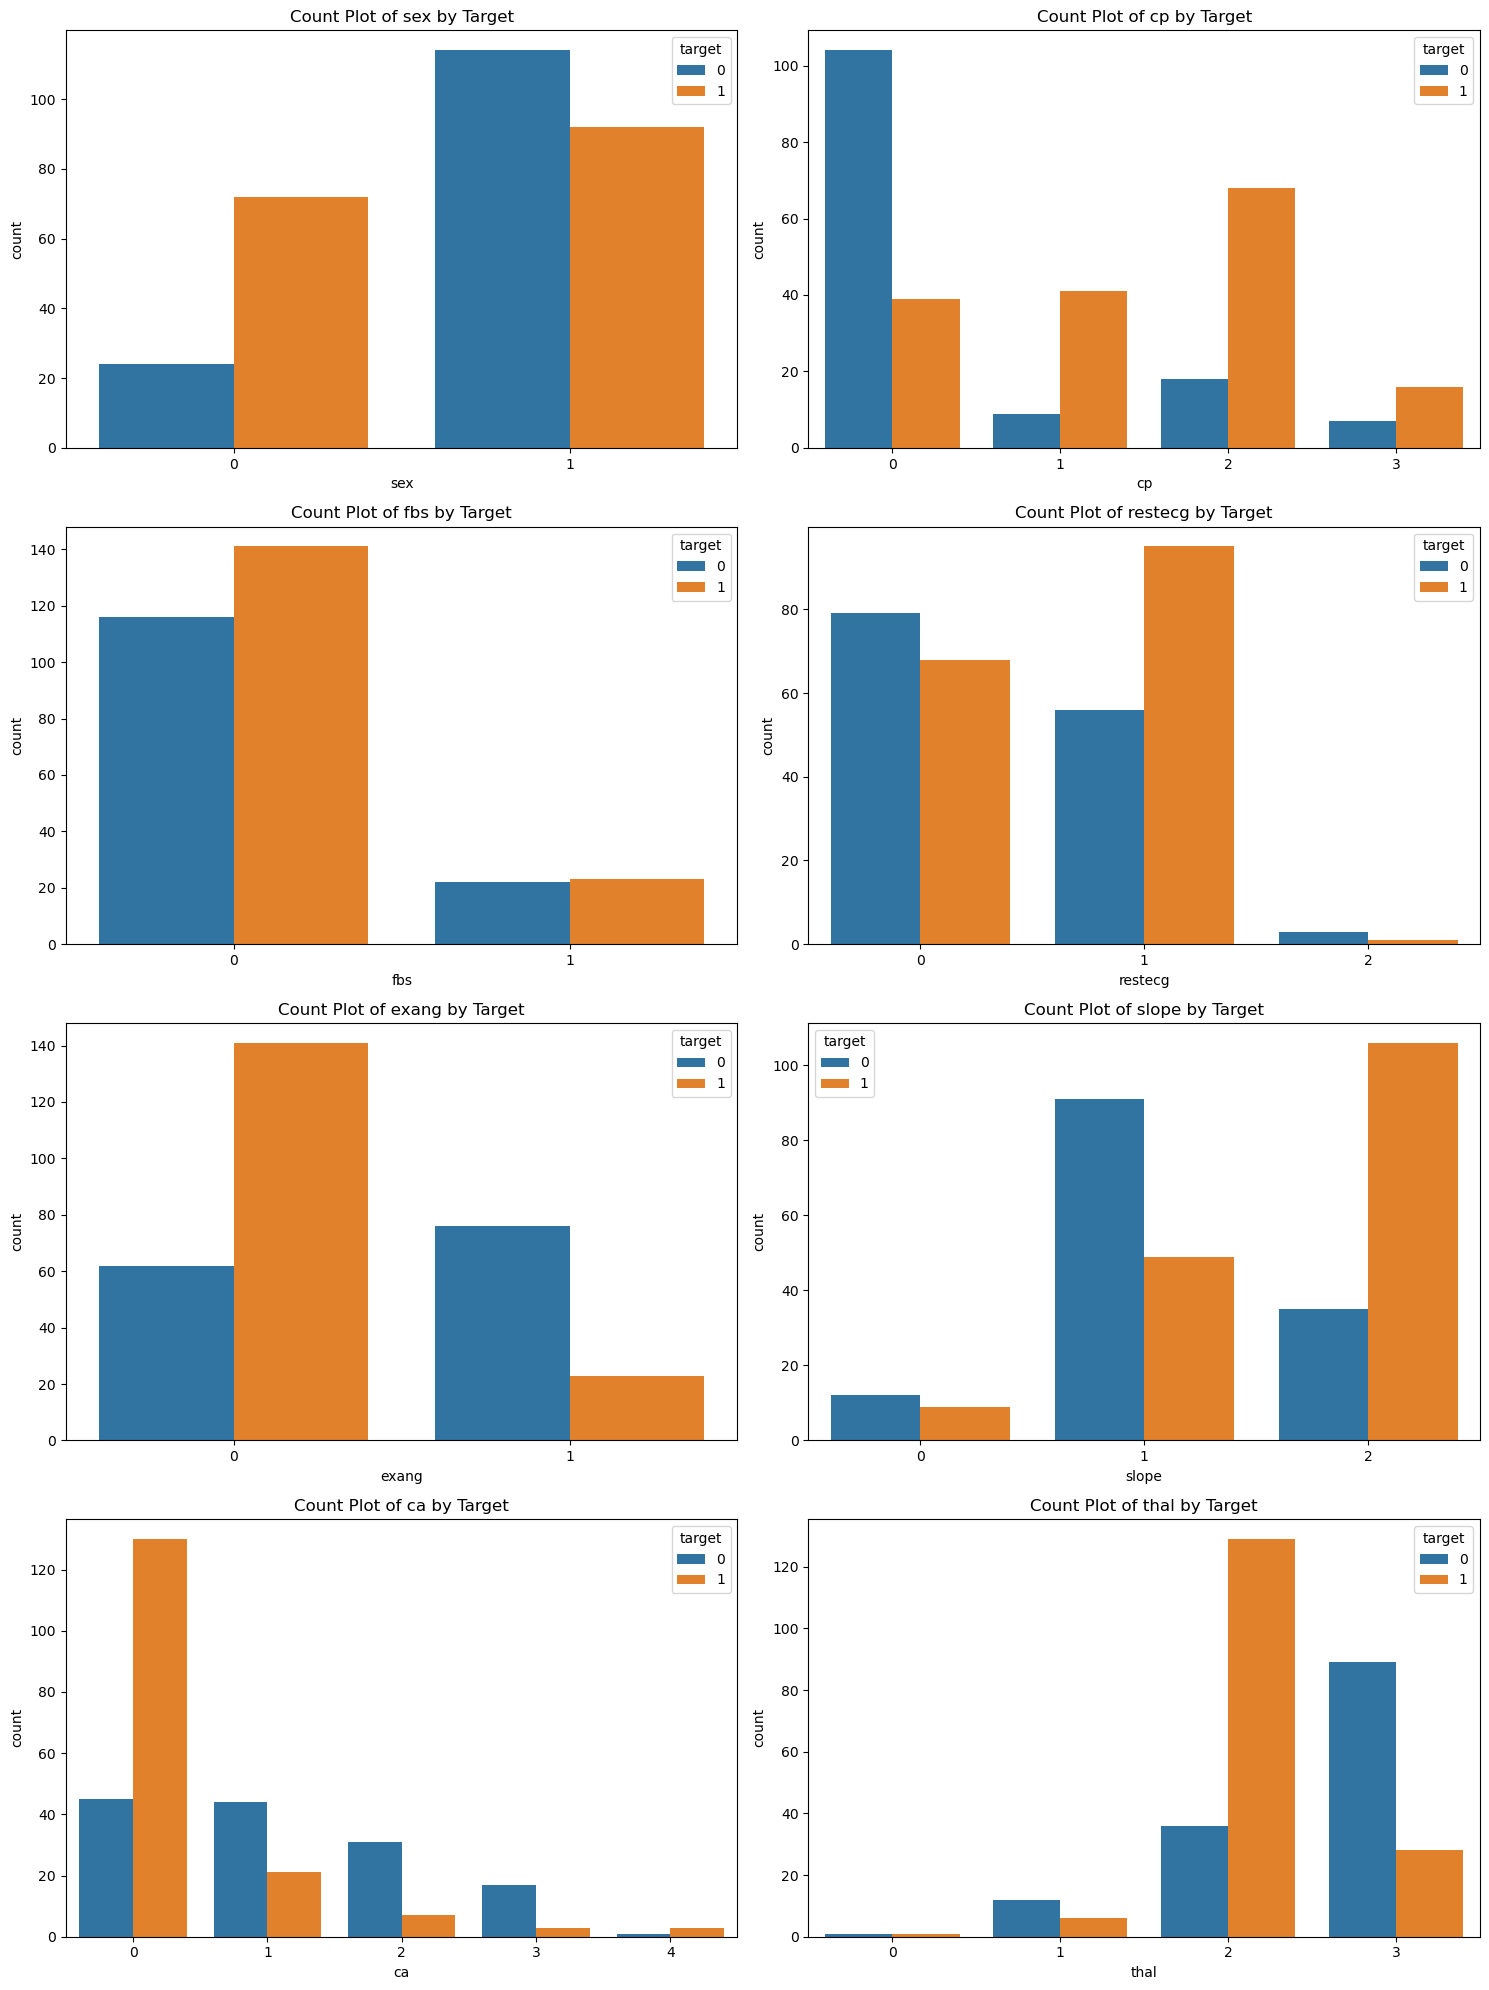

In [21]:
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

plt.figure(figsize=(15, 20))
for i, column in enumerate(categorical_features, 1):
    plt.subplot(4, 2, i)
    sns.countplot(x=column, hue='target', data=df)
    plt.title(f'Count Plot of {column} by Target')
plt.tight_layout()
plt.show()


<Figure size 1500x1000 with 0 Axes>

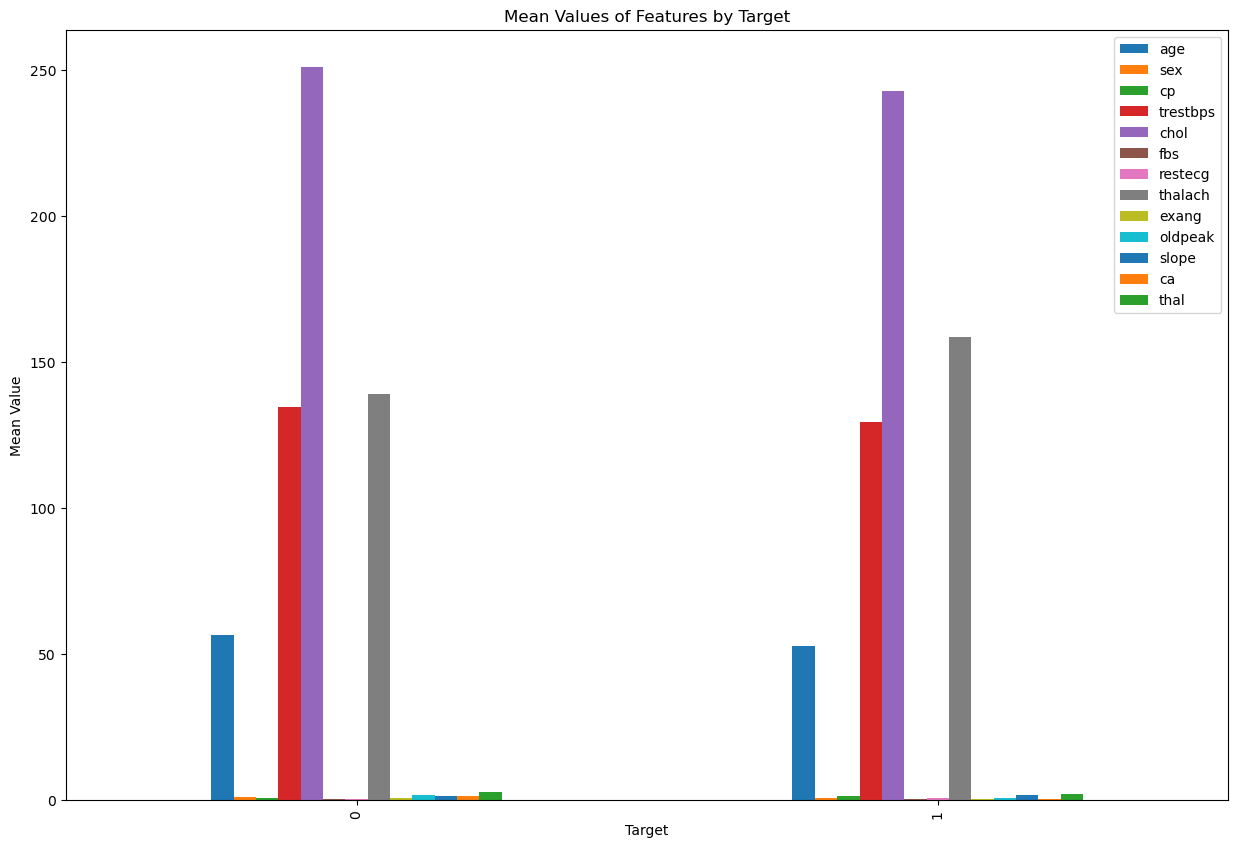

In [22]:
plt.figure(figsize=(15, 10))
df.groupby('target').mean().plot(kind='bar', figsize=(15, 10))
plt.title('Mean Values of Features by Target')
plt.xlabel('Target')
plt.ylabel('Mean Value')
plt.show()


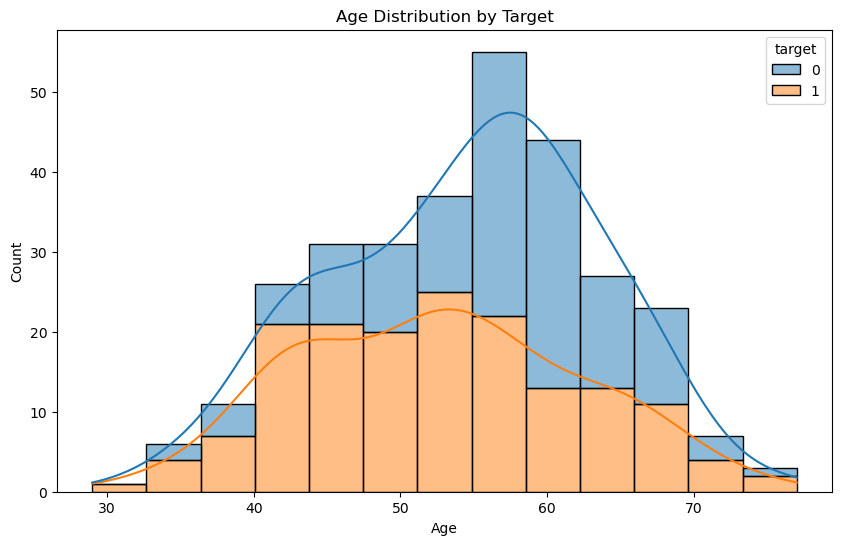

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='target', multiple='stack', kde=True)
plt.title('Age Distribution by Target')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


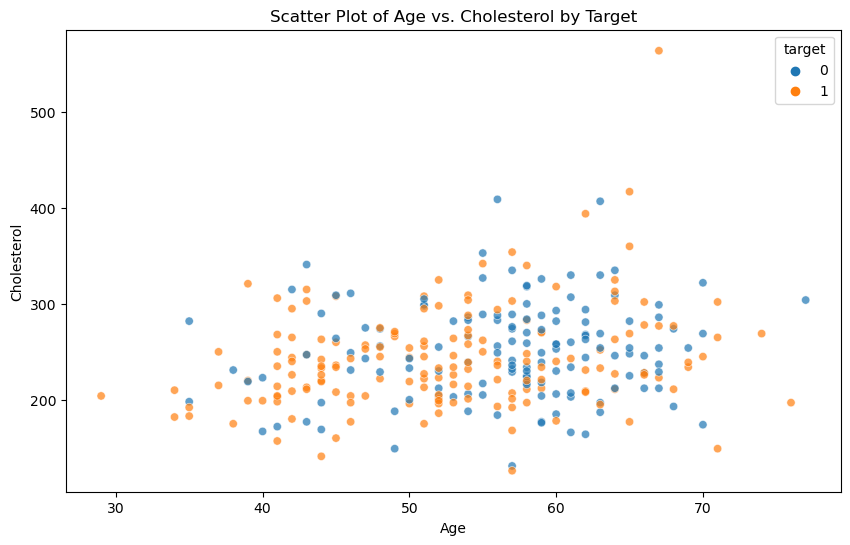

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='chol', hue='target', data=df, alpha=0.7)
plt.title('Scatter Plot of Age vs. Cholesterol by Target')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.show()


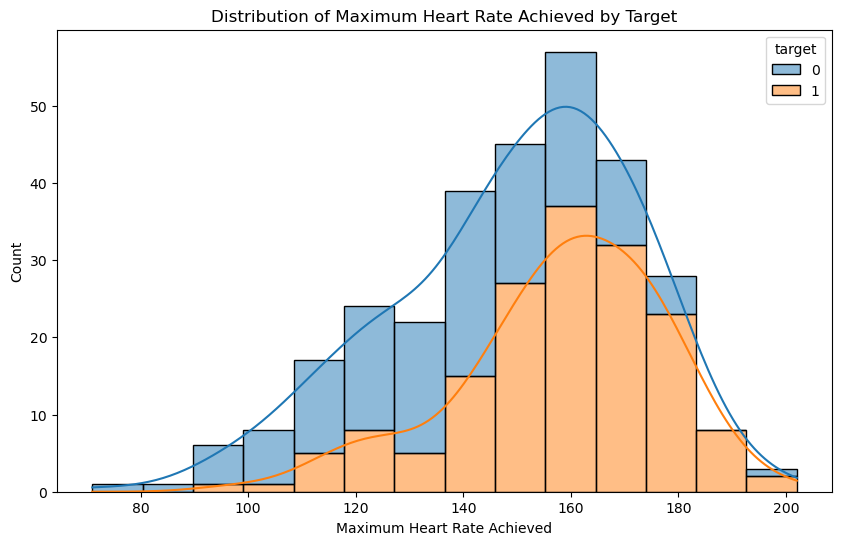

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='thalach', hue='target', multiple='stack', kde=True)
plt.title('Distribution of Maximum Heart Rate Achieved by Target')
plt.xlabel('Maximum Heart Rate Achieved')
plt.ylabel('Count')
plt.show()


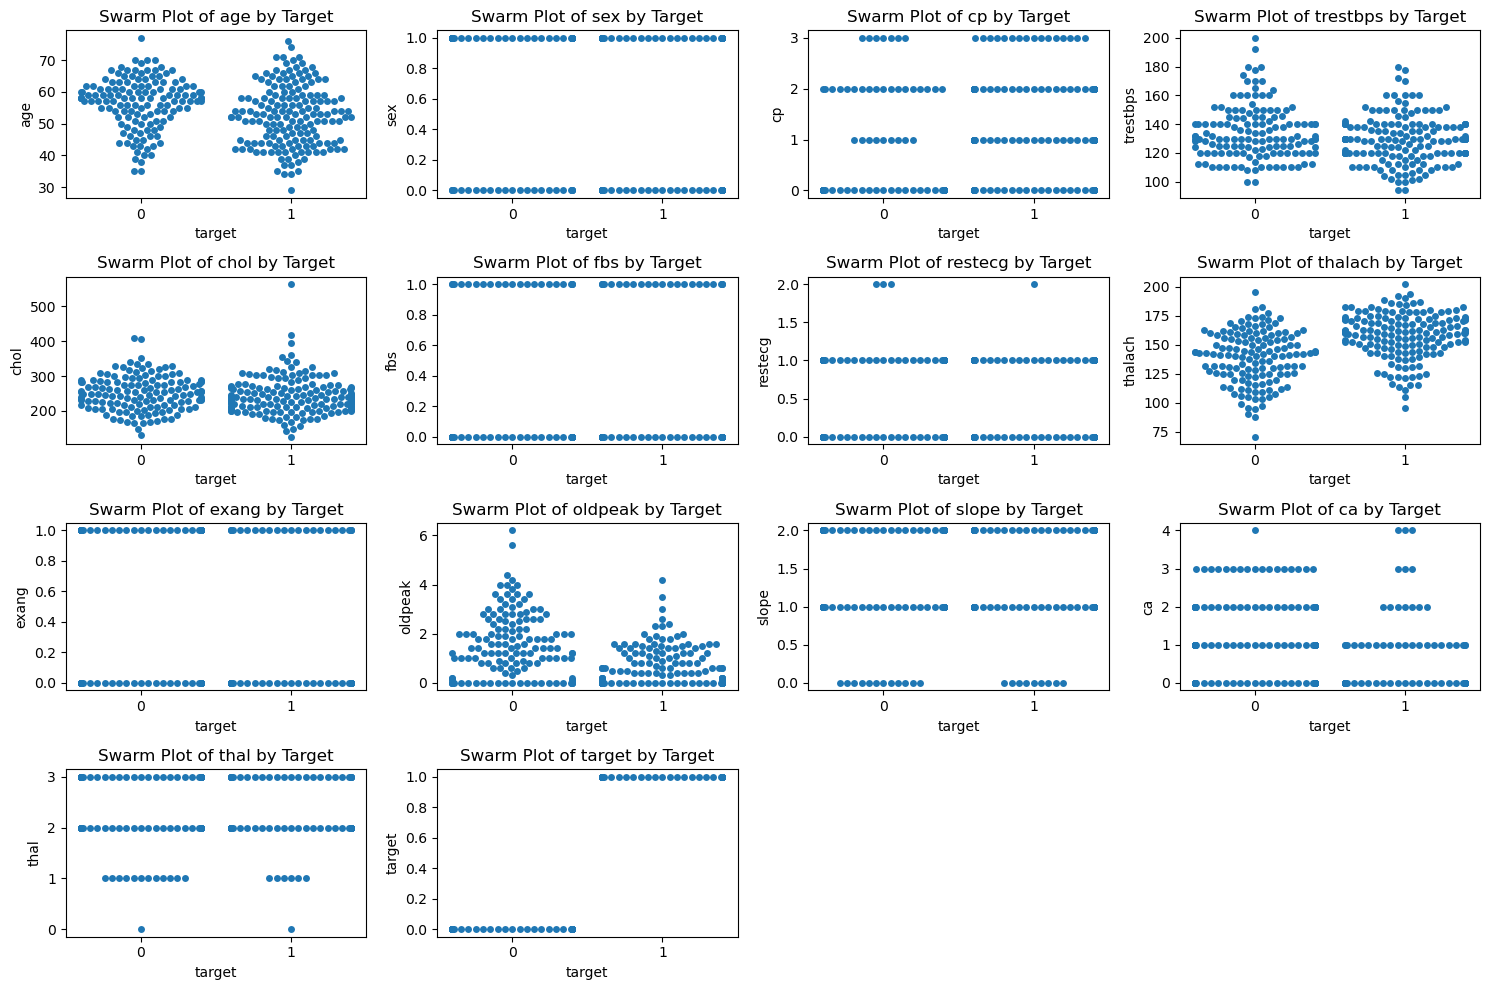

In [26]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[:-1], 1):
    plt.subplot(4, 4, i)
    sns.swarmplot(y=df[column], x=df['target'])
    plt.title(f'Swarm Plot of {column} by Target')
plt.tight_layout()
plt.show()


In [28]:
def drop_outliers_individual(df):
    df_out = df.copy()
    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            outliers = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))
            df_out = df_out.loc[~outliers]
    return df_out

# Drop outliers
df2= drop_outliers_individual(df)

# Display the DataFrame without outliers
print("Original DataFrame shape:", df.shape)
print("DataFrame shape after dropping outliers (individual):", df_no_outliers_individual.shape)
df2.head()


Original DataFrame shape: (302, 15)
DataFrame shape after dropping outliers (individual): (228, 15)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart_Disease
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,NO
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,NO
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,NO
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1,YES
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0,NO
